In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#installing fast ai version 1.0.52
!pip install fastai==1.0.52

In [0]:
# checking the fastai version
!pip show fastai

Name: fastai
Version: 1.0.52
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: torchvision, pandas, nvidia-ml-py3, numexpr, matplotlib, spacy, fastprogress, bottleneck, numpy, typing, Pillow, pyyaml, torch, scipy, dataclasses, requests, beautifulsoup4, packaging
Required-by: 


In [0]:
#importing necessary libraries
from fastai import *
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
#mounting google drive 
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/fdx"


models	oldver-stage1.pth  train  valid


In [0]:
!ls "/content/drive/My Drive/fdx/train"


checks	solids	stripes


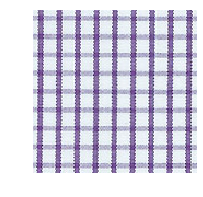

In [0]:
# checking an image from the drive 
img = open_image('/content/drive/My Drive/fdx/train/checks/6043.jpg')
img.show()


In [0]:
# looking at the data shape 
img.data.shape


torch.Size([3, 150, 150])

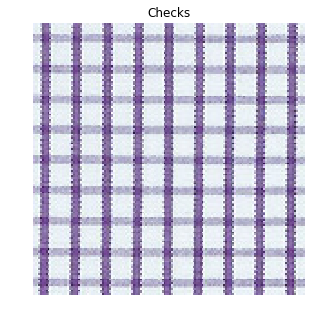

In [0]:
img.show(figsize=(100, 5), title='Checks')

In [0]:
path = '/content/drive/My Drive/fdx'

In [0]:
# using ImageList.from_folder to load the data
np.random.seed(2)
bs = 32

#data augmentation
tfms = get_transforms(do_flip=False)

data = (ImageList.from_folder(path).
        split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))
        

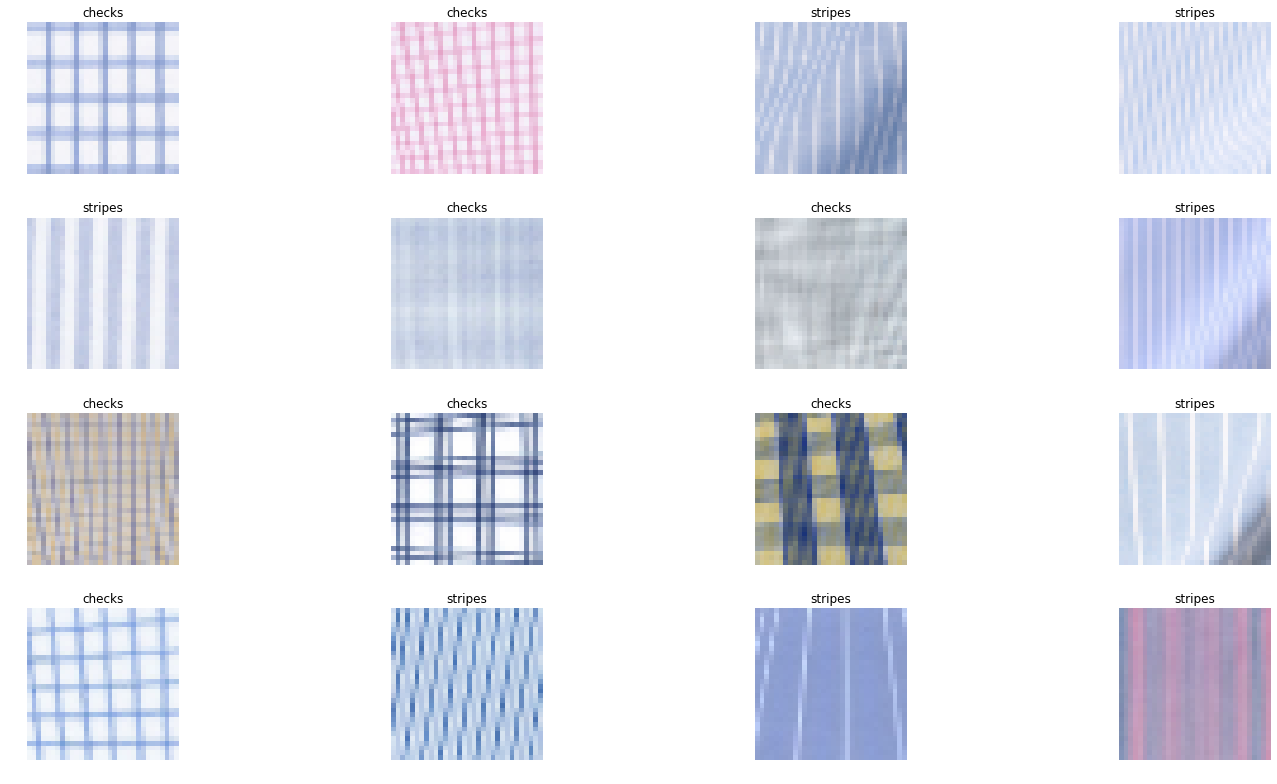

In [0]:
#looking at the data
data.show_batch(rows=4, figsize=(22,11))


In [0]:
# data classes
print(data.classes)


['checks', 'solids', 'stripes']


In [0]:
len(data.classes)


3

In [0]:
#f1 score 
fbeta = FBeta(average='macro', beta=1)


In [0]:
# using resnet34 for pretrained weights
learn = cnn_learner(data, models.resnet34, metrics=[fbeta,Recall(), Precision()])


In [0]:
# fit using one cycle for 13 epochs
learn.fit_one_cycle(13)


epoch,train_loss,valid_loss,f_beta,recall,precision,time
0,1.327952,0.997568,0.540984,0.612378,0.635912,01:29
1,1.099426,0.811281,0.644147,0.723392,0.697023,00:09
2,0.930177,0.544460,0.743317,0.778597,0.738601,00:03
3,0.789376,0.376603,0.818772,0.822749,0.816220,00:03
4,0.702481,0.426766,0.766377,0.772554,0.762568,00:03
5,0.644776,0.421554,0.746698,0.754094,0.744356,00:03
6,0.603219,0.376063,0.773333,0.777057,0.772880,00:03
7,0.558447,0.363392,0.744077,0.730273,0.772994,00:03
8,0.527762,0.338224,0.792746,0.790331,0.798430,00:03
9,0.495585,0.320677,0.784328,0.776257,0.798413,00:03


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [0]:
# saving the model
learn.save('/content/drive/My Drive/fdx/stage1-fit1cycle_wo_unfreeze')

In [0]:
learn.save('/content/stage1-fit1cycle_wo_unfreeze')

In [0]:
# code to look at the confusionmatrix
interp = ClassificationInterpretation.from_learner(learn)

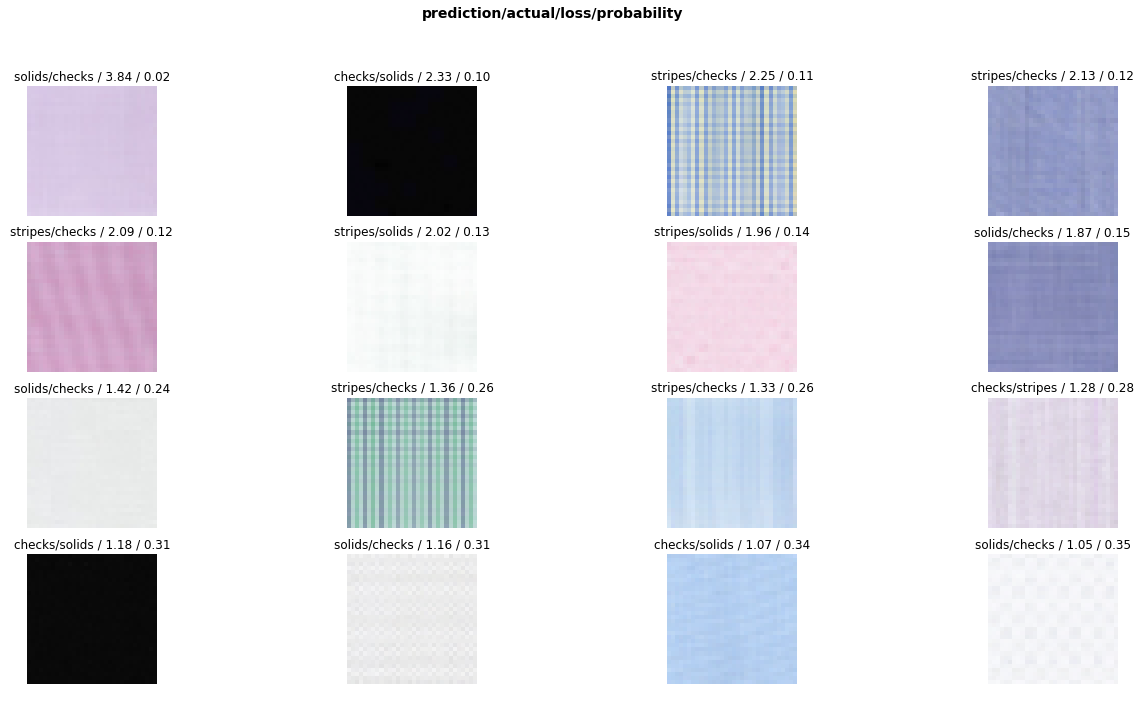

In [0]:
interp.plot_top_losses(16, figsize=(22,11))

In [0]:
interp.most_confused()

[('checks', 'solids', 6),
 ('checks', 'stripes', 6),
 ('solids', 'checks', 4),
 ('solids', 'stripes', 3),
 ('stripes', 'checks', 1),
 ('stripes', 'solids', 1)]

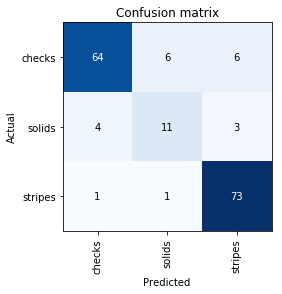

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


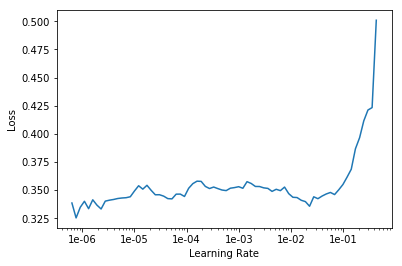

In [0]:
learn.recorder.plot()

In [0]:
Using lr_find, fine tuning with learning rates between 1e-5 and 1e-2
learn.fit_one_cycle(12, max_lr=slice(1e-5,1e-2))


epoch,train_loss,valid_loss,f_beta,recall,precision,time
0,0.403042,0.325372,0.824726,0.817680,0.835879,00:03
1,0.391232,0.333498,0.800709,0.823723,0.788860,00:03
2,0.406475,0.362301,0.803533,0.771579,0.874420,00:03
3,0.432872,0.384204,0.775048,0.805946,0.761420,00:03
4,0.439746,0.390407,0.784325,0.790039,0.779640,00:03
5,0.447007,0.450253,0.801881,0.851754,0.788887,00:03
6,0.430019,0.297503,0.793976,0.814035,0.785258,00:03
7,0.413713,0.357600,0.782527,0.795575,0.777030,00:03
8,0.398666,0.361266,0.729331,0.725770,0.734703,00:03
9,0.386315,0.280774,0.802023,0.799045,0.806929,00:03


In [0]:
learn.save('/content/with_lr_find')

In [0]:
learn.load('/content/with_lr_find')

Learner(data=ImageDataBunch;

Train: LabelList (685 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
stripes,stripes,stripes,stripes,stripes
Path: /content/drive/My Drive/fdx;

Valid: LabelList (169 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
checks,checks,checks,checks,checks
Path: /content/drive/My Drive/fdx;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, a

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

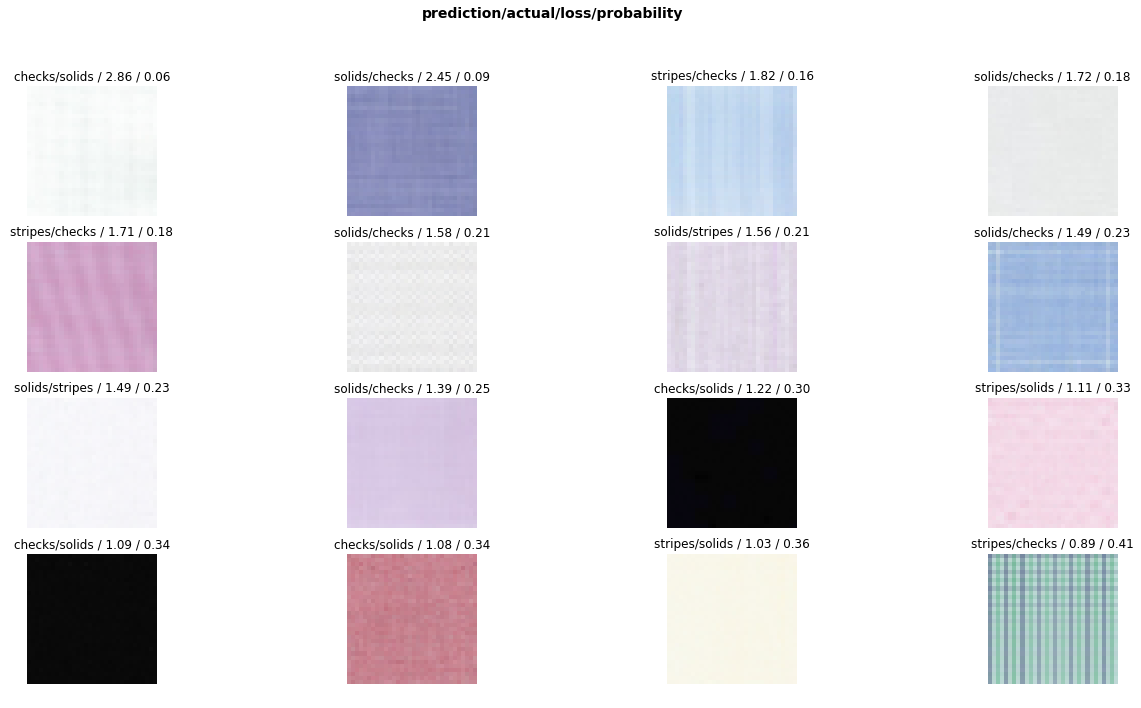

In [0]:
interp.plot_top_losses(16, figsize=(22,11))

In [0]:
interp.most_confused()

[('checks', 'solids', 5),
 ('solids', 'checks', 5),
 ('checks', 'stripes', 3),
 ('solids', 'stripes', 3),
 ('stripes', 'solids', 3)]

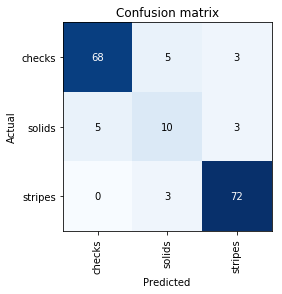

In [0]:
interp.plot_confusion_matrix()

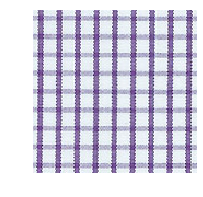

In [0]:
#predicting for an image from train folder
filename = '/content/drive/My Drive/fdx/train/checks/6043.jpg'
img = open_image(filename)
img.show()


In [0]:
losses = learn.predict(img)
prediction = losses[0];
prediction

Category checks

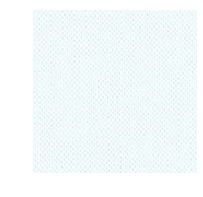

In [0]:
# predicting for an image from valid folder
filename = '/content/drive/My Drive/fdx/valid/solids/5250.jpg'
img = open_image(filename)
img.show()

In [0]:
losses = learn.predict(img)
prediction = losses[0];
prediction

Category solids

In [0]:
#Unfreeze all layers
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


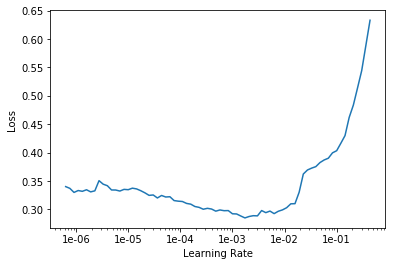

In [0]:
learn.recorder.plot()

In [0]:
# fit with the learing rates found using lr_find
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,f_beta,recall,precision,time
0,0.310365,0.260272,0.801474,0.808791,0.796655,00:03
1,0.329969,0.297787,0.786974,0.790156,0.784405,00:03
2,0.336338,0.260338,0.804864,0.808733,0.801957,00:03
3,0.328481,0.252165,0.826037,0.826394,0.826172,00:03
4,0.316242,0.250228,0.826160,0.826335,0.826203,00:04
5,0.305641,0.236904,0.840731,0.844854,0.837283,00:04
6,0.306097,0.242584,0.840731,0.844854,0.837283,00:03
7,0.302666,0.238476,0.821523,0.822008,0.821906,00:03
8,0.308204,0.242534,0.828118,0.836082,0.821874,00:03
9,0.303438,0.227000,0.836256,0.840468,0.832717,00:03


In [0]:
learn.save('/content/drive/My Drive/fdx/stage1-fit1cycle-all-layers')

In [0]:
learn.save('/content/stage1-fit1cycle-all-layers')

In [0]:
learn = cnn_learner(data, models.resnet34).load('/content/stage1-fit1cycle-all-layers')


In [0]:
# export.pkl file has the model weights
learn.export('/content/export.pkl')

In [0]:
path = '/content'

In [0]:
learn.export()

In [0]:
learn = load_learner(path)

Category solids

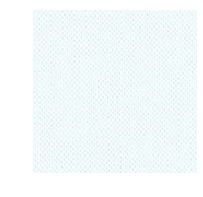

In [0]:
filename = '/content/drive/My Drive/fdx/valid/solids/5250.jpg'
img = open_image(filename)
img.show()
losses = learn.predict(img)
prediction = losses[0];
prediction